In [138]:
# Imports

# Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Webscraping & API
import praw

# NLP
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [139]:
# Problem Statement:
#     The goal os this project will be to analyze some recent subreddit posts among various stocks and to analyze whether
# a post is is regards to the stock market or the options subreddits, making it a binary classification problem. 
# The importance of this is to distinguish between the general stock market and options. Options is an important subsection
# of the stock market which increases the complexity of this model. 

# Success of the model will be evaluated through classification metrics inclduing accuracy, precision, etc.

# The primary audience of this model includes but is not limited to: first-time stock market investors and those interested
# in economics or security analysis. 

In [140]:
# Using API to retieve posts from both the stock and options subreddits


reddit = praw.Reddit(client_id = 'g4FC_rdrpisp6A',     #this is that personal use script key
                     client_secret = 'dQrqoDTuRhpuSMZk_Ew8R_Tros4', #this is that secret key
                     user_agent = 'localtime',    #Whatever name you gave your application
                     username = '',      #your Reddit user name
                     password = '')      #your Reddit password

In [192]:
subreddit = reddit.subreddit('StockMarket') 

TypeError: 'Subreddit' object is not subscriptable

In [142]:
altsubreddit = reddit.subreddit('options')

In [195]:
stocks = subreddit.top(limit = 1000)

In [144]:
options = altsubreddit.top(limit = 1000)

In [145]:
# Using API to retieve posts from both the stock and options subreddits

stock_posts = { "title":[],
                "score":[],
                "id":[],
                "url":[], 
                "comms_num": [],
                "created": [],
                "body":[]}

for item in stocks:
    stock_posts["title"].append(item.title)
    stock_posts["score"].append(item.score)
    stock_posts["id"].append(item.id)
    stock_posts["url"].append(item.url)
    stock_posts["comms_num"].append(item.num_comments)
    stock_posts["created"].append(item.created)
    stock_posts["body"].append(item.selftext)
    

In [146]:
options_posts = { "title":[],
                "score":[],
                "id":[],
                "url":[], 
                "comms_num": [],
                "created": [],
                "body":[]}

#Use a for loop to take the posts gathered by the wrapper and place them into a dictionary.

for item in options:
    options_posts["title"].append(item.title)
    options_posts["score"].append(item.score)
    options_posts["id"].append(item.id)
    options_posts["url"].append(item.url)
    options_posts["comms_num"].append(item.num_comments)
    options_posts["created"].append(item.created)
    options_posts["body"].append(item.selftext)

In [147]:
options_posts_df = pd.DataFrame(options_posts)
options_posts_df['subreddit'] = 0
options_posts_df

,title,score,id,url,comms_num,created,body,subreddit
0,Can mods ban wallstreetbets behaviour and talk?,3200,fvgbu6,https://www.reddit.com/r/options/comments/fvgb...,326,1.586132e+09,"Recently i've been seeing a lot of ""you're a r...",0
1,I hated all the Apps for viewing Stock Reports...,2189,hap5cl,https://v.redd.it/9wy5n1k9eg551,181,1.592421e+09,,0
2,"Any interest in a ""Visual Guide to the Greeks""?",1941,gm289b,https://www.reddit.com/r/options/comments/gm28...,171,1.589840e+09,I get the impression a lot of people have a ha...,0
3,Hello fellow gambl- option traders! I’ve creat...,1767,ft558f,https://i.redd.it/ab0kdcocx8q41.jpg,499,1.585793e+09,,0
4,My option play for last week. Once in a lifeti...,1615,fiur0t,https://i.redd.it/6w93j3cd5rm41.jpg,340,1.584270e+09,,0
...,...,...,...,...,...,...,...,...
991,Betting 20% of my portfolio on dips next week....,60,cv5k32,https://www.reddit.com/r/options/comments/cv5k...,72,1.566747e+09,Thinking about buying week long puts on variou...,0
992,Most Anticipated Earnings Releases for the wee...,66,c0q0oi,https://i.redd.it/afbor3o8ce431.jpg,23,1.560579e+09,,0
993,Anyone know any good premium trades that you c...,60,bjzk5e,https://www.reddit.com/r/options/comments/bjzk...,95,1.556857e+09,For starting out with a smaller account.,0
994,Are Calls Too Expensive Now?,65,a9jiii,https://www.reddit.com/r/options/comments/a9ji...,55,1.545811e+09,"\n\n## With the market way oversold, I expect...",0


In [148]:
stock_posts_df = pd.DataFrame(stock_posts)
stock_posts_df['subreddit'] = 1
stock_posts_df

,title,score,id,url,comms_num,created,body,subreddit
0,US airlines would not need the bailout if they...,4857,ful324,https://www.reddit.com/r/StockMarket/comments/...,633,1.585993e+09,US airlines would not need the bailout if they...,1
1,Welcome to Black Monday of 2020! Market plunge...,4075,fjl7jd,https://i.redd.it/keozc3bah1n41.png,408,1.584395e+09,,1
2,Sen. Kelly Loeffler Dumped Millions in Stock A...,3306,flm21j,https://www.reddit.com/r/StockMarket/comments/...,364,1.584696e+09,>The Senate’s newest member sold off seven fig...,1
3,Mark Cuban: Every household in America should ...,3292,iyw4q1,https://www.reddit.com/r/StockMarket/comments/...,591,1.600979e+09,https://www.cnbc.com/2020/09/23/mark-cuban-ame...,1
4,This Monday is the Anniversary of the 1987 Bla...,2799,jdhwpt,https://i.redd.it/3rpxkpz5dvt51.jpg,334,1.603063e+09,,1
...,...,...,...,...,...,...,...,...
992,How I Use Data to Analyze My Trading Performance,154,bif9p3,https://www.reddit.com/r/StockMarket/comments/...,19,1.556510e+09,Hey all. As a pretty active trader I thought p...,1
993,Analyzing Uber's 300+ page IPO filing (x-post ...,156,bd4mxv,https://www.reddit.com/r/StockMarket/comments/...,40,1.555289e+09,I made a [video](https://www.youtube.com/watch...,1
994,Major US airlines coming back online after sys...,158,b81bhg,https://www.reddit.com/r/StockMarket/comments/...,13,1.554149e+09,https://www.cnbc.com/2019/04/01/southwest-delt...,1
995,"$LYFT - Lyft, Inc. and Uber Could Face Major H...",160,b7wndx,https://www.reddit.com/r/StockMarket/comments/...,35,1.554117e+09,"Lyft, Inc. (NASDAQ: LYFT) and Uber Could Face ...",1


In [149]:
# Combining

all_posts = options_posts_df.append(stock_posts_df)
all_posts.reset_index(inplace = True)
all_posts.drop(columns = ['index'], inplace = True)
all_posts.drop(columns = ['id', 'score', 'comms_num', 'created'], inplace = True)
all_posts

,title,url,body,subreddit
0,Can mods ban wallstreetbets behaviour and talk?,https://www.reddit.com/r/options/comments/fvgb...,"Recently i've been seeing a lot of ""you're a r...",0
1,I hated all the Apps for viewing Stock Reports...,https://v.redd.it/9wy5n1k9eg551,,0
2,"Any interest in a ""Visual Guide to the Greeks""?",https://www.reddit.com/r/options/comments/gm28...,I get the impression a lot of people have a ha...,0
3,Hello fellow gambl- option traders! I’ve creat...,https://i.redd.it/ab0kdcocx8q41.jpg,,0
4,My option play for last week. Once in a lifeti...,https://i.redd.it/6w93j3cd5rm41.jpg,,0
...,...,...,...,...
1988,How I Use Data to Analyze My Trading Performance,https://www.reddit.com/r/StockMarket/comments/...,Hey all. As a pretty active trader I thought p...,1
1989,Analyzing Uber's 300+ page IPO filing (x-post ...,https://www.reddit.com/r/StockMarket/comments/...,I made a [video](https://www.youtube.com/watch...,1
1990,Major US airlines coming back online after sys...,https://www.reddit.com/r/StockMarket/comments/...,https://www.cnbc.com/2019/04/01/southwest-delt...,1
1991,"$LYFT - Lyft, Inc. and Uber Could Face Major H...",https://www.reddit.com/r/StockMarket/comments/...,"Lyft, Inc. (NASDAQ: LYFT) and Uber Could Face ...",1


In [150]:
# EDA

In [151]:
all_posts.isnull().sum()

title        0
url          0
body         0
subreddit    0
dtype: int64

In [152]:
all_posts['subreddit'].value_counts()

1    997
0    996
Name: subreddit, dtype: int64

In [153]:
# Preprocessing 

# Set our X variable to be the title and selftext

X = all_posts['body']

# Set our y variable predictor to the the subreddit

y = all_posts['subreddit']


In [154]:
y.value_counts(normalize = True) # This is a classification problem

1    0.500251
0    0.499749
Name: subreddit, dtype: float64

In [155]:
# Instantiatiing and fitting the Count Vectorizer because the count vectorizer works well with text and will further advance
# our model.

cv = CountVectorizer()

cv.fit(X)

CountVectorizer()

In [156]:
# Transform the Data

X_transform = cv.transform(X)
cv.get_feature_names()

['00',
 '000',
 '00001',
 '0000320193',
 '00003bb5190bc5ae0f4c1a3a16f0c78c974b1043',
 '000089924320003503',
 '000089924320003505',
 '000_profit_in_stock_picks',
 '001',
 '001242255',
 '002',
 '002006262',
 '00334',
 '004',
 '006',
 '0066620767',
 '007',
 '008',
 '009',
 '009b88eac323',
 '00am',
 '00e5a1b0fa2a41abf9807d047e59d3c5145b6015',
 '00pm',
 '01',
 '010',
 '011',
 '012',
 '013',
 '0137047681',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '02',
 '020',
 '021',
 '021014',
 '022',
 '022620',
 '022720',
 '022820',
 '024',
 '024b',
 '025',
 '0254',
 '025p',
 '026',
 '027',
 '029',
 '03',
 '031',
 '031820',
 '031920',
 '032',
 '033',
 '034',
 '036',
 '037',
 '038',
 '039',
 '03b',
 '03d501e2cf1cc8288ce4a71a44d60129654d631b',
 '04',
 '040',
 '041',
 '042',
 '042215',
 '043',
 '044',
 '045',
 '046',
 '047',
 '0471215511',
 '048',
 '049',
 '0498',
 '04m',
 '05',
 '050',
 '050703674',
 '052',
 '055',
 '055139997',
 '057',
 '058',
 '059',
 '05gy8wnf',
 '05p',
 '05pm',
 '05puts',
 '06',

Text(0.5, 1.0, 'Highest Word Counts')

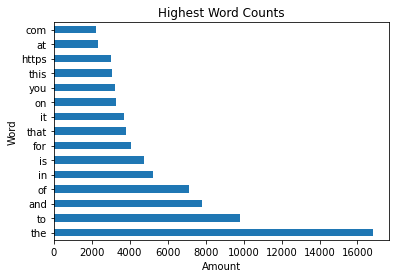

In [157]:
X_transform_df = pd.DataFrame(X_transform.todense(), 
                          columns=cv.get_feature_names())

bar_graph_high = X_transform_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.xlabel('Amount')
plt.ylabel('Word')
plt.title('Highest Word Counts')

# This array provides the highest used words within all the posts.

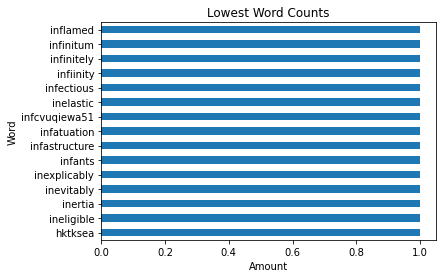

In [158]:
bar_graph_low = X_transform_df.sum().sort_values(ascending=True).head(15).plot(kind='barh');
plt.xlabel('Amount')
plt.ylabel('Word')
plt.title('Lowest Word Counts')
bar_graph_low

# This array provides the lowest used words within all the posts.

In [159]:
# Based off the graphs that were created, it would be a little difficult to determine if the 
# most used words throughout the reddit posts would correlate to the subreddit.

# Another technique we can use to improve our EDA exploration would be stop word removal.

In [160]:
relevant_words = CountVectorizer(stop_words='english')
relevant_words.fit(X)
X_transform_exp = relevant_words.transform(X)

Text(0.5, 1.0, 'Highest Word Counts with StopWords')

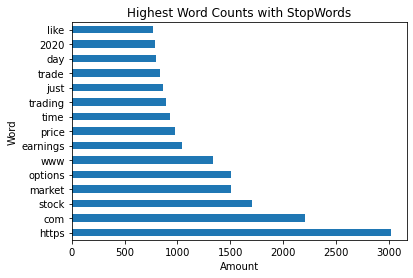

In [161]:
X_transform_exp_df = pd.DataFrame(X_transform_exp.todense(), 
                          columns=relevant_words.get_feature_names())

bar_graph_high = X_transform_exp_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.xlabel('Amount')
plt.ylabel('Word')
plt.title('Highest Word Counts with StopWords')



In [187]:
# Setting up our Pipeline and Parameters

pipe = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])


pipe_params = {
    'cv__max_features': [2000, 3000, 4000, 5000],
    'cv__min_df': [2, 3],
    'cv__max_df': [.9, .95],
    'cv__ngram_range': [(1, 1), (1, 2)]
}

In [188]:
# Fitting into our GridSearch

gs = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [189]:
# Split our data

(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state = 42)

In [190]:
# Fit our model through gridsearch which combines our instantiators including CountVectorization and MultinomialNB

gs.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'cv__max_df': [0.9, 0.95],
                         'cv__max_features': [2000, 3000, 4000, 5000],
                         'cv__min_df': [2, 3],
                         'cv__ngram_range': [(1, 1), (1, 2)]})

In [170]:
acc_0 = gs.score(X_train, y_train)
acc_0

0.7998661311914324

In [167]:
gs.score(X_test, y_test) 

0.8036072144288577

In [168]:
gs.best_score_

0.7744427734506522

In [33]:
# From the scores after conducting our grid search, we see that the best accuracy is around .8 which
# indicates the model could potentially be a good indicator to predict the original subreddit.

In [34]:
preds = gs.predict(X_test)


In [35]:
# Plot the confusion matrix to view classification metrics

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

Text(0.5, 1.0, 'Original Model')

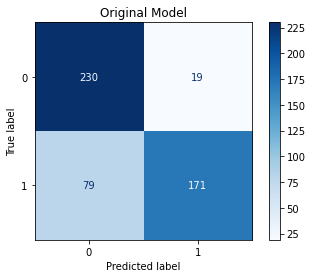

In [84]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');
plt.title("Original Model")

In [197]:
# Specificity

ls = tn / (tn + fp)
ls

0.9989983395655871

In [86]:
# Sensitivity

os = tp / (tp + fn)
os

0.7442326980942828

In [180]:
# Precision

op = tp / (tp + fp)
op

0.9986559139784946

In [128]:
# Accuracy

(tn + tp) / (tn + fp + fn + tp)


0.8716148445336008

In [89]:
# Misclassifcation Rate

1 - acc

0.12838515546639917

In [200]:


print("The precision score is", tp / (tp + fp))

print("The sensitivity score is ", tp / (tp + fn))

# The sensitivity score is not too high.


The precision score is 0.9986559139784946
The sensitivity score is  0.7442326980942828


In [91]:
# Using a random forest classifier

rf = RandomForestClassifier()

In [92]:
# Split our data

(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state = 42)

X_train = cv.transform(X_train)

In [93]:
params = {
    'n_estimators' : [75, 100, 125],
    'max_depth': [None, 3, 4],
    'max_features': ['auto', None]
}

In [94]:
gs_1 = GridSearchCV(rf, params)

In [95]:
gs_1.fit(X_transform, y) # This takes forever to run

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 4],
                         'max_features': ['auto', None],
                         'n_estimators': [75, 100, 125]})

In [96]:
gs_1.best_score_ 

# From the score, we see that the RandomForestClassifier provides a better accuracy score than using the CountVectorizer.

0.7742005768189317

In [97]:
gs_1.score(X_transform, y)

0.8720521826392373

In [98]:
preds_1 = gs_1.predict(X_transform)

In [99]:
# Classification Metrics for Random Forest
tn, fp, fn, tp = confusion_matrix(y, preds_1).ravel()

Text(0.5, 1.0, 'Random Classifier Model')

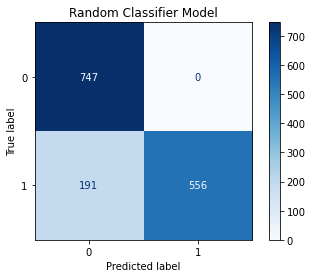

In [100]:
# Confusion Matrix

plot_confusion_matrix(gs_1, X_train, y_train, cmap='Blues', values_format='d');
plt.title("Random Classifier Model")

In [111]:
# Specificity

fsp = tn / (tn + fp)
fsp

0.9989969909729187

In [112]:
# Sensitivity

fse = tp / (tp + fn)
fse

0.7442326980942828

In [179]:
# Precision

fp = tp / (tp + fp)
fp

0.9986541049798116

In [123]:
# Accuracy

acc_0 = (tn + tp) / (tn + fp + fn + tp)
acc_0

0.8716148445336008

In [105]:
# Misclassifcation Rate

1 - acc

0.12838515546639917

In [106]:
# We notice from the classification metrics that precision and sensitivity increase signifcantly on the random
# forest classification model. The accuracy also increases as well from our previous model.

In [198]:
scores = [{'Sensitivity' : fse, 'Precision': fp, 'Model': 'RandomForest', 'Accuracy': acc_1, 'Specificity': fsp}, {'Sensitivity' : os, 'Precision': op, 'Model': 'Original','Accuracy': acc_0, 'Specificity': ls}]

In [199]:
score = pd.DataFrame(scores)
score.set_index('Model', inplace = True)
score

,Sensitivity,Precision,Accuracy,Specificity
Model,,,,
RandomForest,0.744233,0.998654,0.871615,0.998997
Original,0.744233,0.998656,0.799866,0.998998
